<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [43]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
response = requests.get(url)

# Save the file locally
with open("survey-data.csv", "wb") as file:
    file.write(response.content)

print("File downloaded successfully!")


File downloaded successfully!


**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [125]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [131]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [132]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [133]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [48]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [49]:
QUERY = """
SELECT name as table_name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,table_name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:



In [50]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [51]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


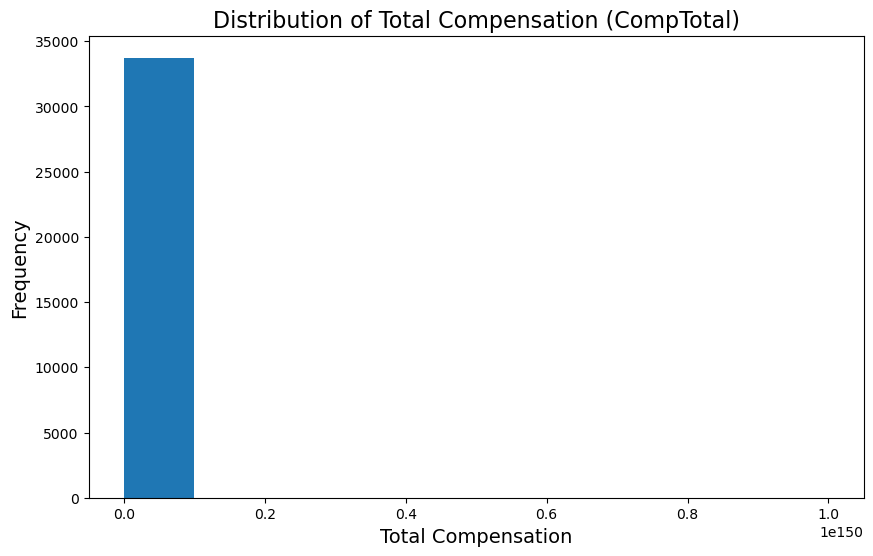

In [134]:
## Write your code here

QUERY = """
SELECT CompTotal
FROM main
"""

df = pd.read_sql_query(QUERY, conn)

comptotal = df['CompTotal'].dropna()

plt.figure(figsize=(10, 6))
plt.hist(comptotal)
plt.title('Distribution of Total Compensation (CompTotal)', fontsize=16)
plt.xlabel('Total Compensation', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()


**Box Plots**

Plot a box plot of Age.


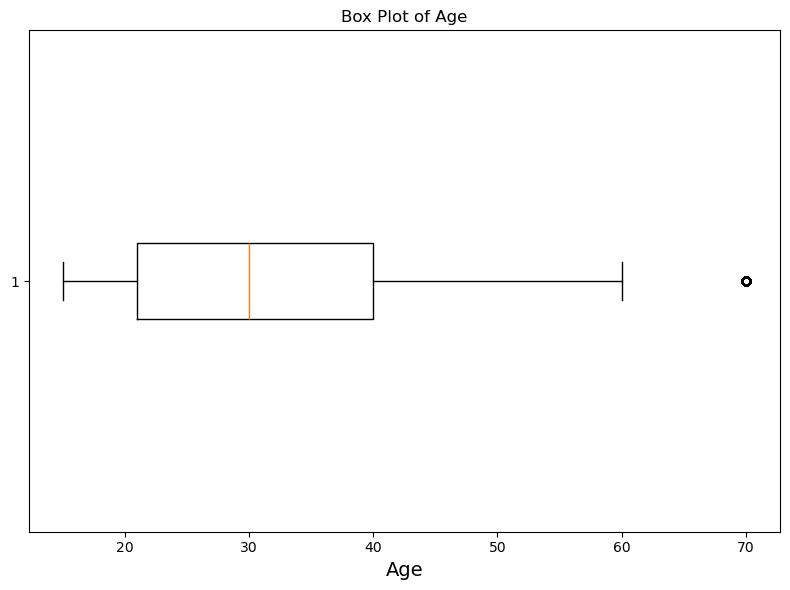

In [135]:
## Write your code here
QUERY = """
SELECT Age
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
age_mapping = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

# Map the Age column to numerical values
age_data_numeric = df['Age'].map(age_mapping).dropna()


plt.figure(figsize=(8, 6))
plt.boxplot(age_data_numeric,vert=False,)
plt.title('Box Plot of Age')
plt.xlabel('Age', fontsize=14)
plt.tight_layout()
plt.show()



### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


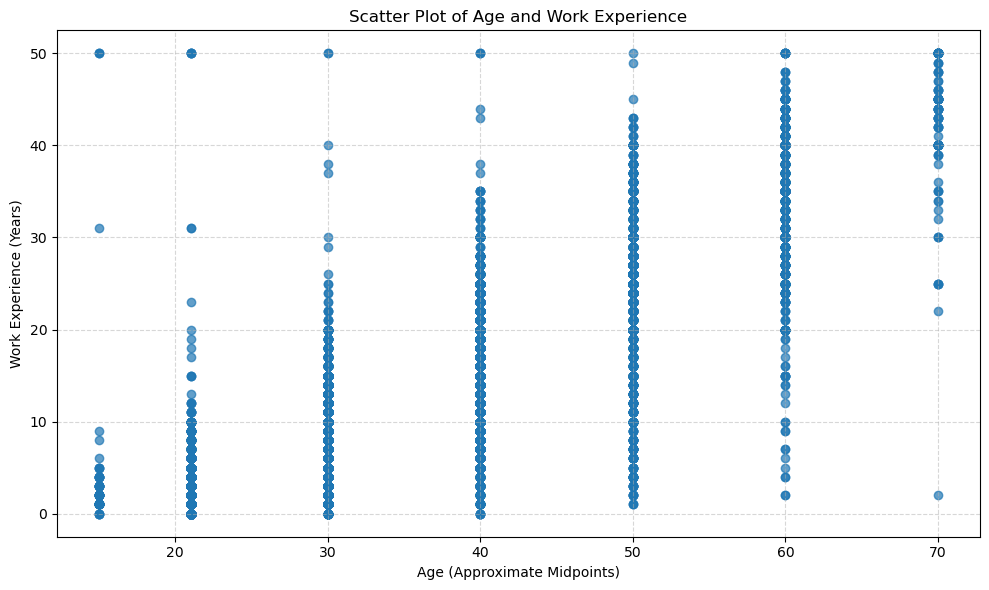

In [200]:
## Write your code here
QUERY = """
SELECT Age, WorkExp
FROM main
 
"""
df = pd.read_sql_query(QUERY, conn)

age_mapping = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
df['Age_numeric'] = df['Age'].map(age_mapping)

plt.figure(figsize=(10, 6))
plt.scatter(df['Age_numeric'], df['WorkExp'], alpha=0.7)
plt.title('Scatter Plot of Age and Work Experience')
plt.xlabel('Age (Approximate Midpoints)')
plt.ylabel('Work Experience (Years)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


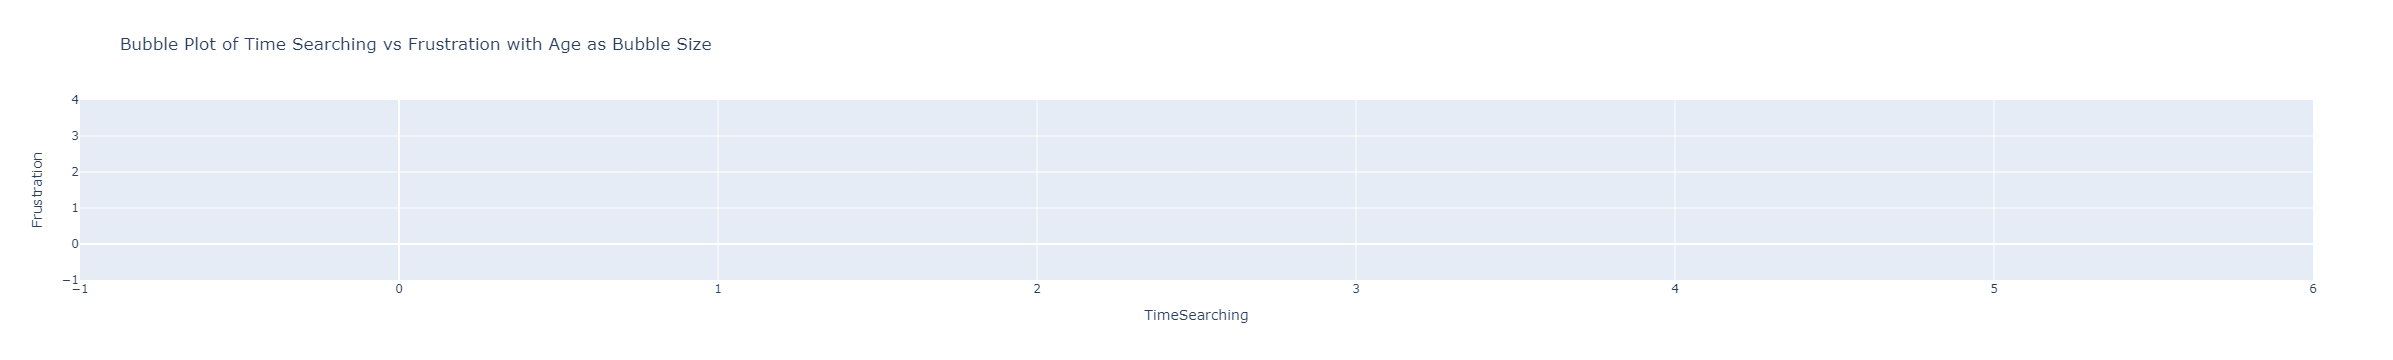

In [164]:
QUERY = """
SELECT TimeSearching, Frustration, Age
FROM main
WHERE TimeSearching IS NOT NULL AND Frustration IS NOT NULL AND Age IS NOT NULL
"""
fig=go.Figure()
fig
# Execute the query and load the results into a DataFrame
df = pd.read_sql_query(QUERY, conn)

# Map Age to numerical midpoints if it contains ranges
age_mapping = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

df['Age_numeric'] = df['Age'].map(age_mapping)


# Drop rows with missing or unmapped Age, TimeSearching, or Frustration
df = df.dropna(subset=['Age_numeric', 'TimeSearching', 'Frustration'])


# Convert numeric columns to appropriate types
df['TimeSearching'] = pd.to_numeric(df['TimeSearching'], errors='coerce')
df['Frustration'] = pd.to_numeric(df['Frustration'], errors='coerce')

fig = px.scatter(df, x= df['TimeSearching'], y= df['Frustration'], size=df['Age_numeric'],
                title='Bubble Plot of Time Searching vs Frustration with Age as Bubble Size' )
fig.show()

#data not showing

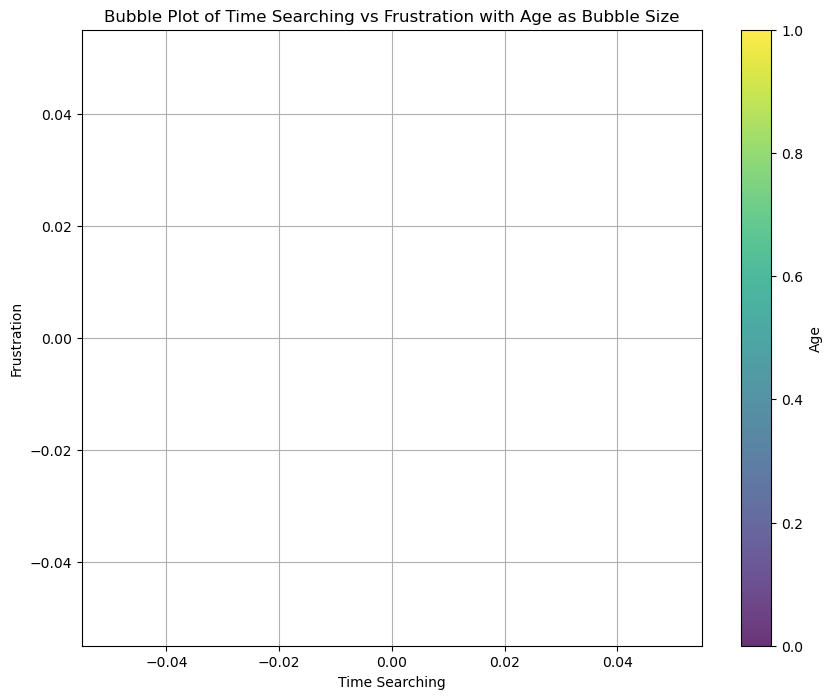

In [156]:
#code help from staff/still not showing the data
QUERY = """
SELECT TimeSearching, Frustration, Age
FROM main
WHERE TimeSearching IS NOT NULL AND Frustration IS NOT NULL AND Age IS NOT NULL
"""
# Define the required columns
required_columns = {'TimeSearching', 'Frustration', 'Age'}

# Check if the required columns exist
if required_columns.issubset(df.columns):
    # Convert columns to numeric, coerce errors to NaN
    for column in required_columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')

    # Drop rows with missing values in the required columns
    df = df.dropna(subset=required_columns)

    # Bubble Plot
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(
        x=df['TimeSearching'],
        y=df['Frustration'],
        s=df['Age'] * 10,  # Scale age to adjust bubble size
        alpha=0.8,
        c=df['Age'],  # Color based on Age
        cmap='viridis',
        edgecolors='black'
    )
    plt.title('Bubble Plot of Time Searching vs Frustration with Age as Bubble Size')
    plt.xlabel('Time Searching')
    plt.ylabel('Frustration')
    plt.colorbar(scatter, label='Age')  # Add color bar to indicate age
    plt.grid(True)
    plt.show()
else:
    missing_columns = required_columns - set(df.columns)
    print(f"The dataset is missing the following required columns: {missing_columns}")

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


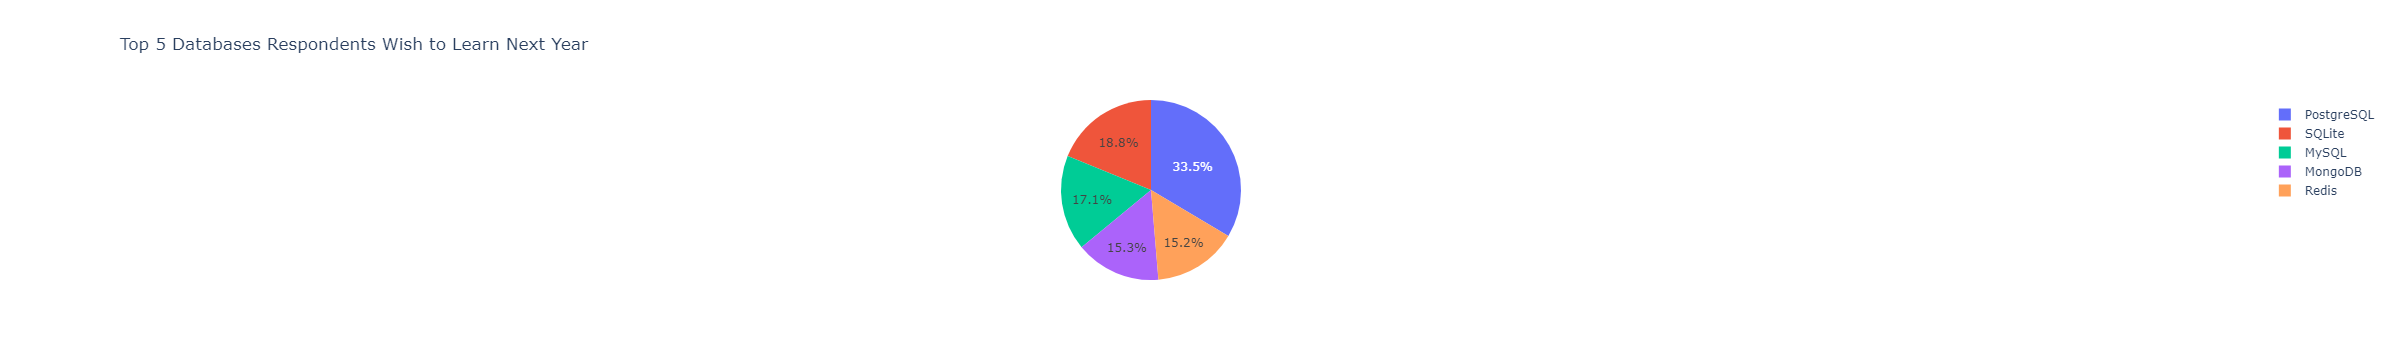

In [188]:
QUERY = """
SELECT DatabaseWantToWorkWith
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
database_counts = df['DatabaseWantToWorkWith'].dropna().str.split(';').explode().value_counts()

database_counts.head(5)

fig = px.pie(
    values=top_5_databases.values, 
    names=top_5_databases.index, 
    title="Top 5 Databases Respondents Wish to Learn Next Year"
)
fig.show()

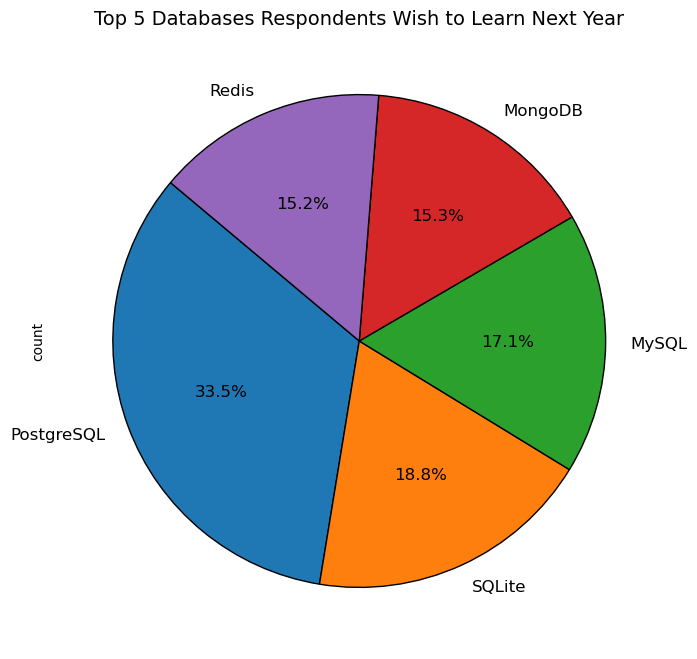

In [190]:
QUERY = """
SELECT DatabaseWantToWorkWith
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
database_counts = df['DatabaseWantToWorkWith'].dropna().str.split(';').explode().value_counts()

database_counts.head(5)


plt.figure(figsize=(8, 8))
top_5_databases.plot.pie(
    autopct='%1.1f%%', startangle=140, fontsize=12, wedgeprops={'edgecolor': 'black'})
plt.title('Top 5 Databases Respondents Wish to Learn Next Year', fontsize=14)

plt.show()

#cleaner verison


**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


In [ ]:
# Filter the dataset for the age group "30-34 years old"
filtered_data = data[data['Age'] == '30-34 years old']

# Calculate the median values for the numeric time columns
median_time = filtered_data[['TimeSearchingNumeric', 'TimeAnsweringNumeric']].median()

# Prepare data for the stacked bar chart
categories = ['Time Searching', 'Time Answering']
values = median_time.values

# Plot the stacked bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['skyblue', 'orange'])
plt.title('Median Time Searching and Answering for Age Group 30-34', fontsize=14)
plt.xlabel('Activity', fontsize=12)
plt.ylabel('Median Time (minutes)', fontsize=12)
plt.show()


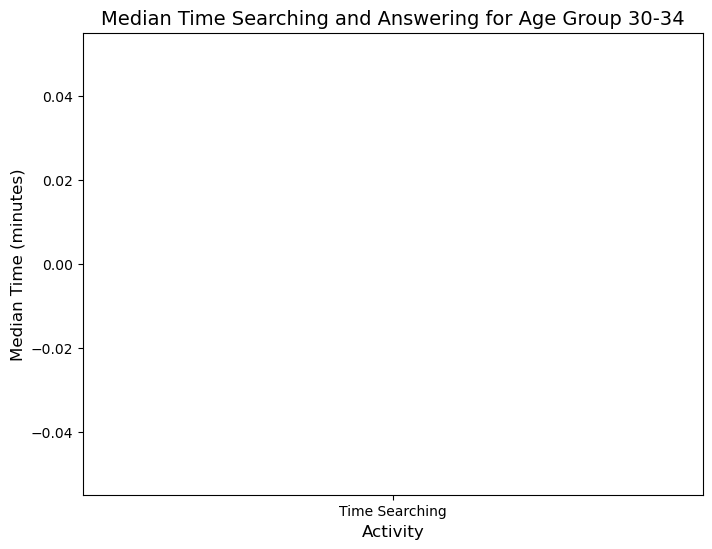

In [223]:
QUERY = """
SELECT Age, TimeSearching, TimeAnswering
FROM main
WHERE TimeSearching IS NOT NULL AND TimeAnswering IS NOT NULL AND Age IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)
time_mapping = {
    "Less than 15 minutes a day": 7.5,
    "15-30 minutes a day": 22.5,
    "30-60 minutes a day": 45,
    "60-120 minutes a day": 90,
    "More than 120 minutes a day": 150
}

# Apply the mapping to transform the time columns
df['TimeSearchingNumeric'] = df['TimeSearching'].map(time_mapping)
df['TimeAnsweringNumeric'] = df['TimeAnswering'].map(time_mapping)
filtered_df = df[(df['Age'] == '30-34 years old')]

median_time = filtered_df[['TimeSearching', 'TimeAnswering']].median()

categories = ['Time Searching', 'Time Answering']
values = median_time.values

plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['skyblue', 'orange'])
plt.title('Median Time Searching and Answering for Age Group 30-34', fontsize=14)
plt.xlabel('Activity', fontsize=12)
plt.ylabel('Median Time (minutes)', fontsize=12)
plt.show()


### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.



In [204]:
## Write your code here
QUERY = """
SELECT Age, CompTotal
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
age_mapping = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
df['Age_numeric'] = df['Age'].map(age_mapping)


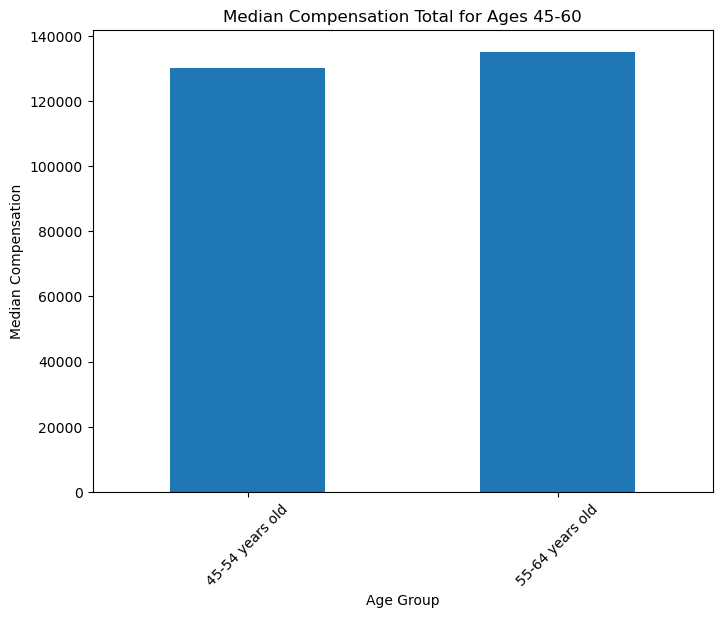

In [221]:

filtered_data = df[df['Age'].isin(['45-54 years old', '55-64 years old'])]

# Calculate the median 'CompTotal' for each age group
median_comp_total = (
    filtered_data.groupby('Age')['CompTotal'].median())


plt.figure(figsize=(8, 6))
median_comp_total.plot(kind='bar')
plt.title('Median Compensation Total for Ages 45-60')
plt.xlabel('Age Group')
plt.ylabel('Median Compensation')
plt.xticks(rotation=45)
plt.show()


**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


In [226]:
## Write your code here
QUERY = """
SELECT MainBranch
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

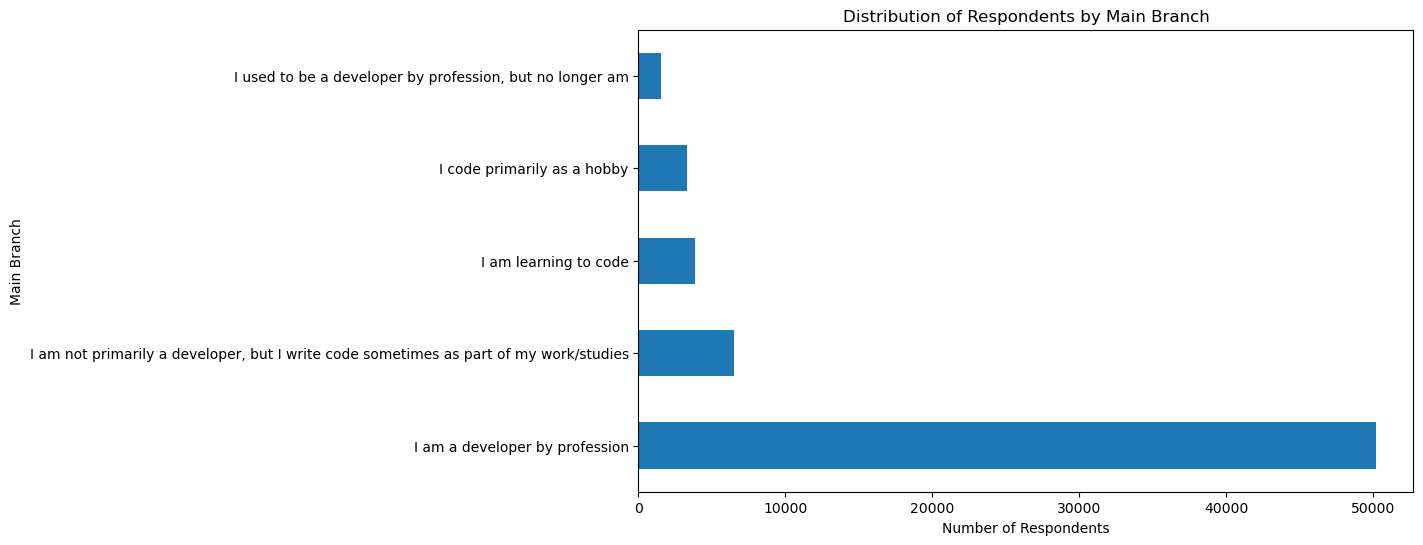

In [228]:

main_branch_counts = df['MainBranch'].value_counts()


plt.figure(figsize=(10, 6))
main_branch_counts.plot(kind='barh')
plt.title('Distribution of Respondents by Main Branch')
plt.xlabel('Number of Respondents')
plt.ylabel('Main Branch')

plt.show()


### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [229]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
